In [1]:
# coding: utf-8
#!/usr/bin/python2
import nltk
import os
import codecs
import argparse
import numpy as np
import string
import re
from pyvi import ViTokenizer
import gensim # In case you have difficulties installing gensim, you need to consider installing conda.
from gensim.models.callbacks import CallbackAny2Vec
import pickle as pickle


pattern = r'[' + string.punctuation +']'

In [3]:
        
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0
        self.losses = []

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))
        self.epoch += 1
        self.losses.append(loss_now)
        
        
def get_min_count(sents):
    '''
    Args:
      sents: A list of lists. E.g., [["I", "am", "a", "boy", "."], ["You", "are", "a", "girl", "."]]
     
    Returns:
      min_count: A uint. Should be set as the parameter value of word2vec `min_count`.   
    '''
    global vocab_size
    from itertools import chain
     
    fdist = nltk.FreqDist(chain.from_iterable(sents))
    min_count = fdist.most_common(vocab_size)[-1][1] # the count of the the top-kth word
    
    return min_count





Make sentences list

In [5]:
global lcode
print ("Making sentences as list...")
sents = []
with codecs.open('data/corpus/corpus-split-2.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        line = re.sub(pattern, '', line)
        if not line: break

        words = ViTokenizer.tokenize(line)
        words = words.split()
        sents.append(words)
        
print ("Done making sentence list")

Making sentences as list...
Done making sentence list


In [4]:
# arguments setting 
lcode = "vi"
vector_size = 300
window_size = 5
vocab_size = 40000
num_negative = 5
epochs = 5

In [12]:

print ("Making word vectors...")   

call_back = callback()

model = gensim.models.Word2Vec(sents, size=vector_size, min_count=300,
                               negative=num_negative, 
                               window=window_size,
                               max_final_vocab=vocab_size,
                               callbacks=[call_back],
                               compute_loss=True,
                               sg = 1,
                               workers = 6,
                               iter=5)

# Save vector to file
model.wv.save_word2vec_format('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.vec'.format(lcode, vector_size, window_size, vocab_size, num_negative), binary=False)

# Save to file
with codecs.open('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.tsv'.format(lcode, vector_size, window_size, vocab_size, num_negative), 'w', 'utf-8') as fout:
    for i, word in enumerate(model.wv.index2word):
        fout.write(u"{}{}\n".format(word.encode('utf8').decode('utf8'),
                                          np.array_str(model[word])[1:-1]
                                          ))
print ("Done.")


Making word vectors...
Loss after epoch 0: 84816144.0
Loss after epoch 1: 21749976.0
Loss after epoch 2: 19611048.0
Loss after epoch 3: 8040560.0
Loss after epoch 4: 0.0


C:\Users\lego2\anaconda3\envs\python36-clone-GUI\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Done.


In [13]:
model.save('data/vectors-sg/{}-{}-{}-{}-{}-fullsplit23-sg-token.model'.format(lcode, vector_size, window_size, vocab_size, num_negative))

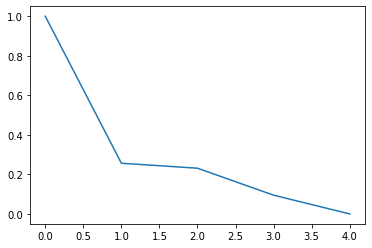

In [20]:
import matplotlib.pyplot as plt
norm = [float(i)/max(call_back.losses) for i in call_back.losses]
plt.plot(norm)

In [19]:
model.wv.most_similar('chó')

[('mèo', 0.7886817455291748),
 ('Chó', 0.7447218298912048),
 ('khỉ', 0.6874362230300903),
 ('cún', 0.629489541053772),
 ('dê', 0.6191039085388184),
 ('thỏ', 0.6176832914352417),
 ('voi', 0.6150242686271667),
 ('chú', 0.6122985482215881),
 ('cừu', 0.6077669262886047),
 ('thú', 0.6032854914665222)]

In [18]:
vec = (model.wv['vua'] - model.wv['nam'] + model.wv['nữ'])
model.wv.most_similar([vec])


[('vua', 0.7888818979263306),
 ('Vua', 0.7106341123580933),
 ('hoàng_hậu', 0.5910625457763672),
 ('nhà_vua', 0.572587251663208),
 ('hoàng', 0.5406604409217834),
 ('Thái_hậu', 0.5298261046409607),
 ('Hoàng_hậu', 0.5247060656547546),
 ('thái_tử', 0.49926233291625977),
 ('nữ_hoàng', 0.49619436264038086),
 ('đại_thần', 0.4897298812866211)]

5

In [12]:
len(sents)

15000000

['Chây_ì', 'nộp', 'phạt', 'nguội']

In [6]:

update_model = gensim.models.Word2Vec.load("data/vectors-sg/vi-300-5-40000-5-fullsplit23-sg-token.model")

In [8]:
update_model.wv.most_similar('chó')

[('mèo', 0.7886817455291748),
 ('Chó', 0.7447218298912048),
 ('khỉ', 0.6874362230300903),
 ('cún', 0.629489541053772),
 ('dê', 0.6191039085388184),
 ('thỏ', 0.6176832914352417),
 ('voi', 0.6150242686271667),
 ('chú', 0.6122985482215881),
 ('cừu', 0.6077669262886047),
 ('thú', 0.6032854914665222)]

In [10]:
print ("Making update sentences as list...")
update_sents = []
with codecs.open('data/corpus/corpus-split-3.txt', 'r', 'utf-8-sig') as fin:
    while 1:
        line = fin.readline()
        line = re.sub(pattern, '', line)
        if not line: break

        words = ViTokenizer.tokenize(line)
        words = words.split()
        update_sents.append(words)
        
print ("Done update making sentence list")

Making update sentences as list...
Done update making sentence list


15000000